In [364]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA


In [365]:
# Load dataset
df = pd.read_csv("C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/WA_Fn-UseC_-Telco-Customer-Churn2.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,NaN,Yes
3,7795-CFOCW,Male,0,No,No,-5,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.85,151.65,Yes


In [366]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7048 non-null   object 
 1   gender            7047 non-null   object 
 2   SeniorCitizen     7048 non-null   int64  
 3   Partner           7048 non-null   object 
 4   Dependents        7048 non-null   object 
 5   tenure            7048 non-null   int64  
 6   PhoneService      7048 non-null   object 
 7   MultipleLines     7048 non-null   object 
 8   InternetService   7048 non-null   object 
 9   OnlineSecurity    7048 non-null   object 
 10  OnlineBackup      7048 non-null   object 
 11  DeviceProtection  7048 non-null   object 
 12  TechSupport       7048 non-null   object 
 13  StreamingTV       7048 non-null   object 
 14  StreamingMovies   7048 non-null   object 
 15  Contract          7048 non-null   object 
 16  PaperlessBilling  7048 non-null   object 


In [367]:
# Check the dimension of the DataFrame
df.shape

(7048, 21)

In [368]:
# Find the duplicate rows
df.count()

customerID          7048
gender              7047
SeniorCitizen       7048
Partner             7048
Dependents          7048
tenure              7048
PhoneService        7048
MultipleLines       7048
InternetService     7048
OnlineSecurity      7048
OnlineBackup        7048
DeviceProtection    7048
TechSupport         7048
StreamingTV         7048
StreamingMovies     7048
Contract            7048
PaperlessBilling    7048
PaymentMethod       7048
MonthlyCharges      7047
TotalCharges        7047
Churn               7048
dtype: int64

In [369]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)
# Remove the duplicate rows
df = df.drop_duplicates()
df.head(5)

Number of duplicate rows:  (5, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,NaN,Yes
3,7795-CFOCW,Male,0,No,No,-5,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.85,151.65,Yes


In [370]:
# Find the number of missing values
print(df.isnull().sum())

customerID          0
gender              1
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      1
TotalCharges        1
Churn               0
dtype: int64


In [371]:
# Find missing values in 'Totalcharges'
print("Missing values in TotalCharges:", df["TotalCharges"].isna().sum())

Missing values in TotalCharges: 1


In [372]:
# Impute with 0
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [373]:
# Find missing values after filling 'TotalCharges'
print("Missing values after:", df.isnull().sum())

Missing values after: customerID          0
gender              1
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      1
TotalCharges        0
Churn               0
dtype: int64


In [374]:
# Convert columns to numeric
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [375]:
# Fill numeric columns with missing values with median
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [376]:
# Fill categorical columns with missing values with mode
df['SeniorCitizen'] = df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0])
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

# Find the number of missing values after handling
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [377]:
# Standardize categorical data
# Step 1: lowercase + strip all text columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip()

# Step 2: Fix inconsistencies
df['InternetService'] = df['InternetService'].replace({'dsl': 'dsl', 'fiber optic': 'fiber optic'})
df['Contract'] = df['Contract'].replace({'12 months': 'one year'})

# Step 3: Drop rows where churn == 'maybe'
df = df[df['Churn'] != 'maybe']

In [378]:
sns.set(color_codes=True)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [379]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:", categorical_cols)


Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [380]:
for col in categorical_cols:
    print(f"{col} unique values:", df[col].unique())

customerID unique values: ['7590-vhveg' '5575-gnvde' '3668-qpybk' ... '4801-jzazl' '8361-ltmkd'
 '3186-ajiek']
gender unique values: ['male' 'female']
Partner unique values: ['yes' 'no']
Dependents unique values: ['no' 'yes']
PhoneService unique values: ['no' 'yes']
MultipleLines unique values: ['no phone service' 'no' 'yes']
InternetService unique values: ['dsl' 'fiber optic' 'no']
OnlineSecurity unique values: ['no' 'yes' 'no internet service']
OnlineBackup unique values: ['yes' 'no' 'no internet service']
DeviceProtection unique values: ['no' 'yes' 'no internet service']
TechSupport unique values: ['no' 'yes' 'no internet service']
StreamingTV unique values: ['no' 'yes' 'no internet service']
StreamingMovies unique values: ['no' 'yes' 'no internet service']
Contract unique values: ['month-to-month' 'one year' 'two year']
PaperlessBilling unique values: ['yes' 'no']
PaymentMethod unique values: ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']

In [381]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']  # gender: Female=0, Male=1 (arbitrary)
label_encoder = LabelEncoder()

In [382]:
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(f"\nEncoded {col} :", df[col].head().values)


Encoded gender : [1 1 1 1 0]

Encoded Partner : [1 0 0 0 0]

Encoded Dependents : [0 0 0 0 0]

Encoded PhoneService : [0 1 1 0 1]

Encoded PaperlessBilling : [1 0 1 0 1]


In [383]:
multi_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod']

# Filter to only include columns that actually exist in the DataFrame
multi_cols = [col for col in multi_cols if col in df.columns]

# One-hot encode with drop_first=True to avoid multicollinearity
df = pd.get_dummies(df, columns=multi_cols, prefix=multi_cols, drop_first=True, dtype=int)

# Target: Churn (Yes/No) - Label encode separately (Yes=1, No=0)
df['Churn'] = label_encoder.fit_transform(df['Churn'])

# Show encoded DataFrame info
print("\nEncoded DataFrame shape:", df.shape)
print("Encoded columns sample:")
print(df.head())


Encoded DataFrame shape: (7042, 32)
Encoded columns sample:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-vhveg       1              0        1           0       1   
1  5575-gnvde       1              0        0           0      34   
2  3668-qpybk       1              0        0           0       2   
3  7795-cfocw       1              0        0           0      -5   
4  9237-hqitu       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           70.35       1889.50  ...   
2             1                 1           53.85          0.00  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           25.85        151.65  ...   

   TechSupport_yes  StreamingTV_no internet service  StreamingTV_yes  \
0                0 

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_25356\1781214837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='gender', data=df, palette=['lightpink', 'lightblue'])


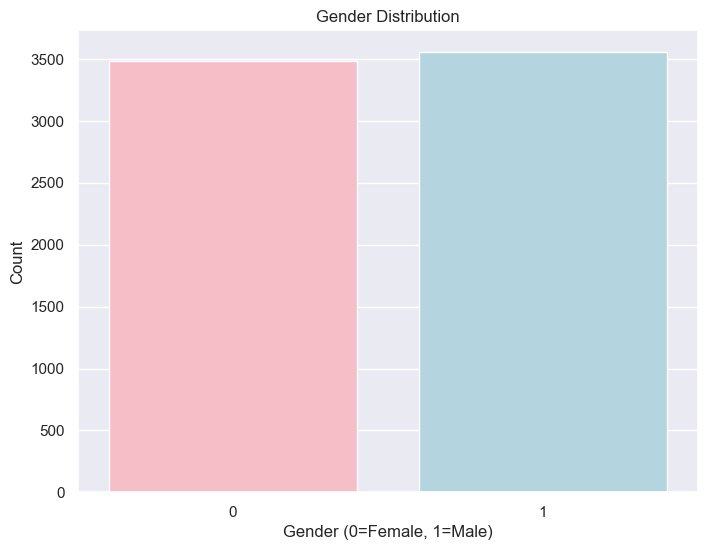

In [384]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', data=df, palette=['lightpink', 'lightblue'])
plt.title('Gender Distribution')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Count')

plt.show()


plt.close()

In [385]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [386]:
df.to_csv("C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/encode_dataset.csv", index=False)


In [387]:
df_before= pd.read_csv("C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/encode_dataset.csv")

In [388]:
original_shape = df_before.shape

In [389]:
#Calculate Q1, Q3, and IQR
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df_before['TotalCharges'] = pd.to_numeric(df_before['TotalCharges'], errors='coerce')

Q1 = df_before[num_cols].quantile(0.25)   # 25th percentile
Q3 = df_before[num_cols].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1                             # Interquartile Range

In [390]:
print("===== Outliers in Each Column =====")
for col in num_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = df_before[(df_before[col] < lower_bound) | (df_before[col] > upper_bound)][col]
    print(f"{col} - Number of outliers: {len(outliers)}")
    print(outliers.values, "\n")   # Display actual outlier values

===== Outliers in Each Column =====
tenure - Number of outliers: 0
[] 

MonthlyCharges - Number of outliers: 0
[] 

TotalCharges - Number of outliers: 0
[] 



In [391]:
# Remove outliers (values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR)
df_after = df_before[~((df_before[num_cols] < (Q1 - 1.5 * IQR)) |
                       (df_before[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape before:", original_shape)   # Original dataset size
print("Shape after :", df_after.shape)   # After outlier removal

Shape before: (7042, 32)
Shape after : (7042, 32)


In [392]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_yes,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,7590-vhveg,1,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-gnvde,1,0,0,0,34,1,0,70.35,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,3668-qpybk,1,0,0,0,2,1,1,53.85,0.00,...,0,0,0,0,0,0,0,0,0,1
3,7795-cfocw,1,0,0,0,-5,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-hqitu,0,0,0,0,2,1,1,25.85,151.65,...,0,0,0,0,0,0,0,0,1,0


In [393]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [394]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("Post-Scaling Statistics:\n", df[numerical_features].describe())

Post-Scaling Statistics:
              tenure  MonthlyCharges  TotalCharges
count  7.042000e+03    7.042000e+03  7.042000e+03
mean  -7.466652e-17   -5.045035e-19 -6.356744e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.521367e+00   -1.545740e+00 -1.007514e+00
25%   -9.513719e-01   -9.724706e-01 -8.298114e-01
50%   -1.370930e-01    1.856994e-01 -3.905714e-01
75%    9.214695e-01    8.337429e-01  6.647281e-01
max    1.613607e+00    1.794177e+00  2.826560e+00


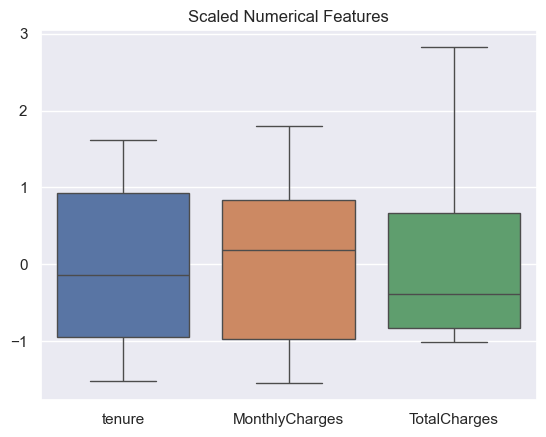

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df[numerical_features])
plt.title('Scaled Numerical Features')


plt.show()
plt.close()


In [396]:
df = df.drop('customerID', axis=1)
print("--- 'customerID' column dropped. ---")

print("\n--- First 5 rows of the new dataset ---")
print(df.head())

--- 'customerID' column dropped. ---

--- First 5 rows of the new dataset ---
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        1           0 -1.277083             0   
1       1              0        0           0  0.066477             1   
2       1              0        0           0 -1.236369             1   
3       1              0        0           0 -1.521367             0   
4       0              0        0           0 -1.236369             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -1.160237     -0.994336      0  ...   
1                 0        0.185699     -0.173357      0  ...   
2                 1       -0.362645     -1.007514      1  ...   
3                 0       -0.746486     -0.194879      0  ...   
4                 1       -1.293169     -0.940565      1  ...   

   TechSupport_yes  StreamingTV_no internet service  StreamingTV_yes  \
0                0  

In [397]:
df_selected = df.drop('TotalCharges', axis=1)
print("\n--- 'TotalCharges' feature removed. ---")
print("Shape of DataFrame after dropping feature:", df_selected.shape)


--- 'TotalCharges' feature removed. ---
Shape of DataFrame after dropping feature: (7042, 30)


In [398]:
# Calculate and Plot Correlation with Churn
print("\n--- Calculating correlation of remaining features with 'Churn'... ---")
plt.figure(figsize=(12, 10))

# Calculate correlation with 'Churn' and sort the values
churn_correlation = df_selected.corr()['Churn'].sort_values(ascending=False)

# Display the final correlation values
print("\n--- Final ranking of features by correlation with Churn: ---")
print(churn_correlation.drop('Churn'))


--- Calculating correlation of remaining features with 'Churn'... ---

--- Final ranking of features by correlation with Churn: ---
InternetService_fiber optic              0.307504
PaymentMethod_electronic check           0.301877
MonthlyCharges                           0.192869
PaperlessBilling                         0.191747
SeniorCitizen                            0.150858
StreamingTV_yes                          0.063165
StreamingMovies_yes                      0.061318
MultipleLines_yes                        0.040032
PhoneService                             0.011689
gender                                  -0.008870
MultipleLines_no phone service          -0.011689
DeviceProtection_yes                    -0.066226
OnlineBackup_yes                        -0.082322
PaymentMethod_mailed check              -0.091550
PaymentMethod_credit card (automatic)   -0.134353
Partner                                 -0.150544
Dependents                              -0.164286
TechSupport_yes  

<Figure size 1200x1000 with 0 Axes>

In [399]:

df_final = df_selected

output_filename = 'C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/selected_features_dataset.csv'

df_final.to_csv(output_filename, index=False)

print(f" Final dataset with selected features successfully saved as '{output_filename}'")

 Final dataset with selected features successfully saved as 'C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/selected_features_dataset.csv'


In [400]:
df= pd.read_csv("C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/data.selected_features_dataset.csv")

# Separate target variable
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [401]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [402]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio per component:")
print(explained_variance)


Explained Variance Ratio per component:
[3.56342205e-01 1.74812073e-01 6.87640133e-02 3.96146495e-02
 3.75176456e-02 3.47692047e-02 3.22579004e-02 2.94477230e-02
 2.82996210e-02 2.58614904e-02 2.17279121e-02 2.14797917e-02
 1.99036509e-02 1.90742080e-02 1.81565298e-02 1.74420339e-02
 1.53048304e-02 1.35182209e-02 1.16928235e-02 7.33892735e-03
 6.60655603e-03 6.79896135e-05 4.99297727e-18 3.82624343e-18
 7.01004748e-19 6.58738764e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


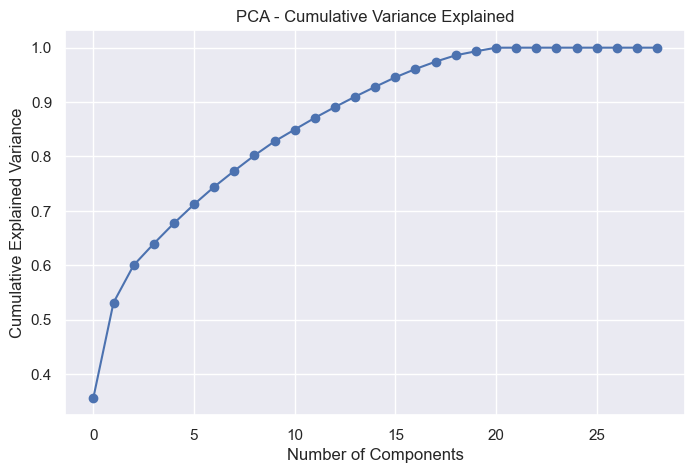

In [403]:
# Cumulative variance plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Variance Explained")
plt.grid(True)
plt.show()
plt.close()


In [404]:
# Choose number of components
threshold = 0.90 # Using 90% as in the previous successful run
n_components = np.argmax(np.cumsum(explained_variance) >= threshold) + 1
print(f"Number of components to preserve {threshold*100:.0f}% variance = {n_components}")

Number of components to preserve 90% variance = 14


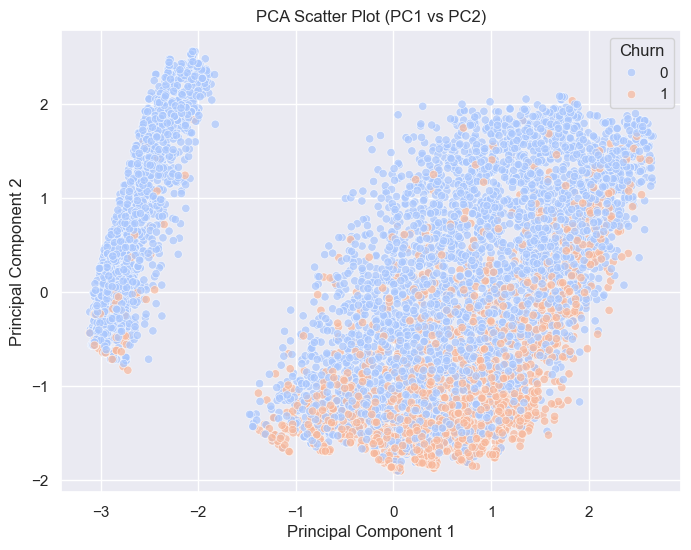

In [405]:
# Scatter plot of first 2 principal components
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (PC1 vs PC2)")

plt.show()
plt.close()

In [406]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(explained_variance))],
    index=X.columns
)

print("\n🔹 PCA Feature Loadings (first 5 PCs):")
print(loadings.iloc[:, :5])


🔹 PCA Feature Loadings (first 5 PCs):
                                            PC1       PC2       PC3       PC4  \
gender                                -0.004079  0.002771 -0.009120 -0.009381   
SeniorCitizen                          0.051434 -0.036495  0.094973 -0.142522   
Partner                                0.044399  0.201327 -0.006541  0.604761   
Dependents                            -0.028027  0.127698 -0.077700  0.641105   
tenure                                 0.223444  0.804111  0.000631 -0.299757   
PhoneService                           0.008041  0.008140  0.280795  0.104487   
PaperlessBilling                       0.114951 -0.078464  0.119701 -0.144266   
MonthlyCharges                         0.597465 -0.071196  0.327876  0.140136   
MultipleLines_No phone service        -0.008041 -0.008140 -0.280795 -0.104487   
MultipleLines_Yes                      0.140094  0.095233  0.318575  0.001073   
InternetService_Fiber optic            0.200624 -0.113384  0.380525  0

In [407]:
# The number of features before PCA is the number of columns in the DataFrame X.
print(f"Number of features before PCA: {X.shape[1]}")
# Select the first n_components from the PCA-transformed data
X_pca_reduced = X_pca[:, :n_components]

print(f"Shape of the reduced dataset (using {n_components} components): {X_pca_reduced.shape}")



Number of features before PCA: 29
Shape of the reduced dataset (using 14 components): (7043, 14)


In [408]:

df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(X_pca_reduced.shape[1])])

df['Churn'] = y.values
output_path = "C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/results/outputs/final_dataset.csv"


df.to_csv(output_path, index=False)

print(f"PCA reduced dataset saved to: {output_path}")

PCA reduced dataset saved to: C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/results/outputs/final_dataset.csv
